In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as st

In [2]:
st.use("ggplot")

In [3]:
df=pd.read_csv("newJordan.csv",usecols=["id","phone","religion","birthday","first","last","gender","lang"])

In [4]:
df=df.drop_duplicates()

In [6]:
df.groupby("gender")["gender"].count()
# plt.legend()

gender
female     977873
male      2054414
Name: gender, dtype: int64

In [7]:
df[df["phone"]>=962785555555].count()

id          2001393
phone       2001393
religion      42755
birthday     114849
first       2001389
last        2001379
gender      1951844
lang        2001393
dtype: int64

check duplicate id

In [9]:
df[df["phone"]<=962785555555].count()

id          1099692
phone       1099692
religion      16014
birthday      44527
first       1099691
last        1099680
gender      1080444
lang        1099692
dtype: int64

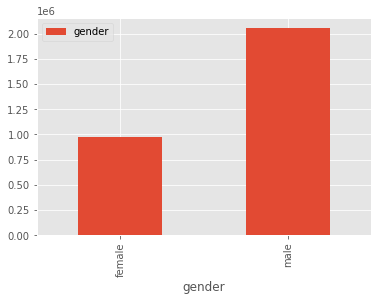

In [10]:
df.groupby("gender")["gender"].count().plot(kind="bar")
plt.legend()

apperently adding or changing a phone number results in duplicate records with the second one being the latter record

In [ ]:
# how droping duplicates affect indexes?
df[df.duplicated("id",keep=False)].sort_values("id")

In [ ]:
df.reset_index()
# df.reindex()

In [13]:
import re

there is 11667 unique religion, not unique really, just the description or the languge used

In [14]:
df.religion.value_counts()

الاسلام                                                                                                 6531
Muslim                                                                                                  5257
Muslim - Sunni                                                                                          4168
Islam                                                                                                   4113
مسلم                                                                                                    3580
                                                                                                        ... 
Muslim and proud (Live Free Or Die Hard)                                                                   1
مسلم سني وألي الفخر                                                                                        1
moslem (i hane nothig .........................shiet i dont need any person on my life                     1
الاسلام (أشهد ان لا

In [15]:
# df.religion.str.findall(".*Mu*.")

In [74]:
newd=df.replace({"religion":[".*(سن|Islam|isl|Musulman|sl|Ислам|SL|Sl|سل|مح|محم).*"]},"Muslim",regex=True)

In [75]:
newd=newd.replace({"religion":[".*(Христианство|sih|seh|cristian|atholic|ch|CH|Ch|مسي).*"]},"Christian",regex=True)

In [76]:
newd=newd.replace({"religion":[".*(God|god|GOD|Other|other).*"]},"Other",regex=True)

In [77]:
newd=newd.replace({"religion":[".*(الله|م|ﺍﻟ|isalam|ﺍﻟﻠﻪ|Isalm|allah|ﻣﺴﻠﻢ|Allah|isalm|لل|الا).*"]},"Muslim",regex=True)

In [78]:
newd=newd.replace({"religion":[".*(indu|udd).*"]},"Hindu & Buddhist",regex=True)

In [79]:
newd=newd.replace({"religion":[".*(uman|UMAN).*"]},"Humanism",regex=True)

In [81]:
newd=newd.replace({"religion":[".*(ruze|urzi).*"]},"Druze",regex=True)

In [115]:
newd=newd.replace({"religion":[".*(ecular|gnostic|Ath|None|none|أدري|no|No|NON|non).*"]},"Non believer",regex=True)

the below script shows that the unique values have reduced from 11667 to 421 with around 400 contributing to 1.5% of total records. 
these 1.5 are strange font, languages and phrases.

In [153]:
newd.religion.value_counts()

Muslim                          55743
Christian                        1751
Other                             593
Non believer                      137
Humanism                           28
                                ...  
▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄▀▄        1
อิสสลาม (รัก อิสลาม)                1
لن أصف نفسي إلا أني فلسطيني         1
Pastafarian                         1
Metal \m/                           1
Name: religion, Length: 421, dtype: int64

In [137]:
newd.religion.value_counts(normalize=True)[:10]*100

Muslim                              94.852641
Christian                            2.979513
Other                                1.009053
Non believer                         0.233120
Humanism                             0.047645
Hindu & Buddhist                     0.035734
Druze                                0.030629
Judaism                              0.011911
ا                                    0.010210
What are your religious beliefs?     0.010210
Name: religion, dtype: float64

<AxesSubplot:>

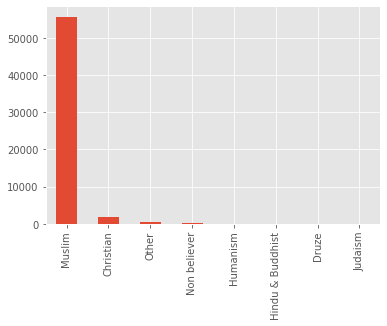

In [152]:
newd[newd.religion.notna()].religion.value_counts()[0:8].plot(kind="bar")

logarithmic scale, graph could be deceiving, islam has 94.853% of the not nan religion values

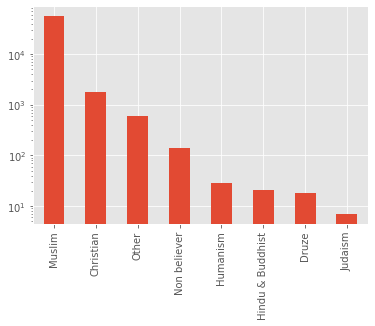

In [151]:
newd[newd.religion.notna()].religion.value_counts()[0:8].plot(kind="bar")
plt.yscale("log")